Block 1: Generate and Prepare the Synthetic Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random temperature data (e.g., between 10 and 40 °C)
n_samples = 1000
temperatures = np.random.uniform(10, 40, n_samples)

# Define a linear relationship: Energy_Output = 2.5 * Temperature + 5 with added noise
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 10, n_samples)
energy_output = true_slope * temperatures + true_intercept + noise

# Create a DataFrame
data = pd.DataFrame({
    'Temperature': temperatures,
    'Energy_Output': energy_output
})

# Display the first five rows of the dataset
print("Sample of the dataset:")
print(data.head())

Sample of the dataset:
   Temperature  Energy_Output
0    21.236204      59.867519
1    38.521429      87.950129
2    31.959818      88.701524
3    27.959755      81.005244
4    14.680559      47.299303


Block 2: Exploratory Data Analysis (EDA)

Statistical summary of the dataset:
       Temperature  Energy_Output
count  1000.000000    1000.000000
mean     24.707697      67.758200
std       8.764121      23.622980
min      10.138961       9.832736
25%      17.079198      48.836262
50%      24.904221      67.936755
75%      32.329588      86.528632
max      39.991530     126.854296


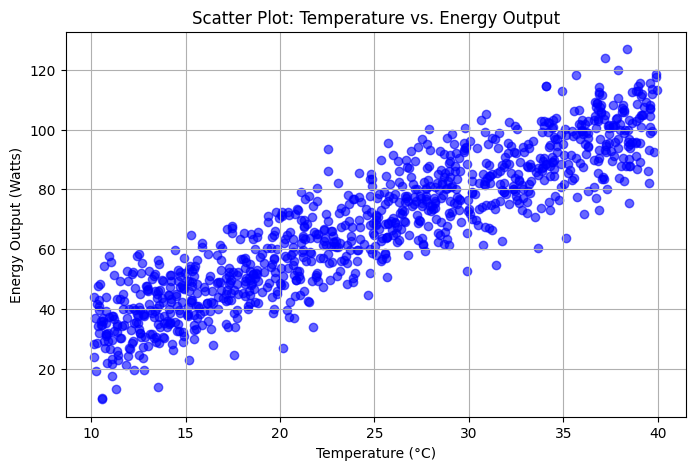

In [19]:
# Display statistical summary
print("Statistical summary of the dataset:")
print(data.describe())

# Plot scatter plot between Temperature and Energy_Output
plt.figure(figsize=(8, 5))
plt.scatter(data['Temperature'], data['Energy_Output'], color='blue', alpha=0.6)
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Output (Watts)')
plt.title('Scatter Plot: Temperature vs. Energy Output')
plt.grid(True)
plt.show()

Block 3: Implementing Linear Regression Using Gradient Descent

Parameters from gradient descent:
Intercept (b): 0.853572734401728
Slope (w): 2.6789138841878457


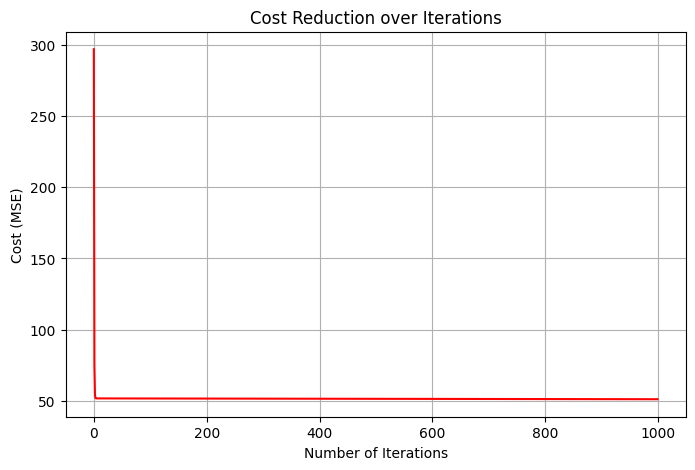

In [20]:
# Define the cost function (Mean Squared Error)
def compute_cost(b, w, X, y):
    m = len(y)
    predictions = w * X + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Implement the gradient descent algorithm
def gradient_descent(X, y, b_init, w_init, learning_rate, num_iterations):
    m = len(y)
    b = b_init
    w = w_init
    cost_history = []
    
    for i in range(num_iterations):
        predictions = w * X + b
        # Calculate gradients
        b_gradient = (1/m) * np.sum(predictions - y)
        w_gradient = (1/m) * np.sum((predictions - y) * X)
        
        # Update parameters
        b -= learning_rate * b_gradient
        w -= learning_rate * w_gradient
        
        cost = compute_cost(b, w, X, y)
        cost_history.append(cost)
    
    return b, w, cost_history

# Extract input data
X = data['Temperature'].values
y = data['Energy_Output'].values

# Initial parameter settings
b_initial = 0
w_initial = 0
learning_rate = 0.001
num_iterations = 1000

# Run gradient descent
b_final, w_final, cost_history = gradient_descent(X, y, b_initial, w_initial, learning_rate, num_iterations)

print("Parameters from gradient descent:")
print("Intercept (b):", b_final)
print("Slope (w):", w_final)

# Plot the cost history
plt.figure(figsize=(8, 5))
plt.plot(range(num_iterations), cost_history, color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction over Iterations')
plt.grid(True)
plt.show()

Block 4: Using scikit-learn for Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Reshape the data for scikit-learn
X_reshaped = X.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X_reshaped, y)

# Predict energy output using the trained model
y_pred = model.predict(X_reshaped)

print("scikit-learn model parameters:")
print("Intercept (b):", model.intercept_)
print("Slope (w):", model.coef_[0])

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

scikit-learn model parameters:
Intercept (b): 7.263753128448819
Slope (w): 2.4484049456482184
Mean Squared Error (MSE): 97.4967881779458
R² Score: 0.8251138271651539


Block 5: Visual Comparison of the Models

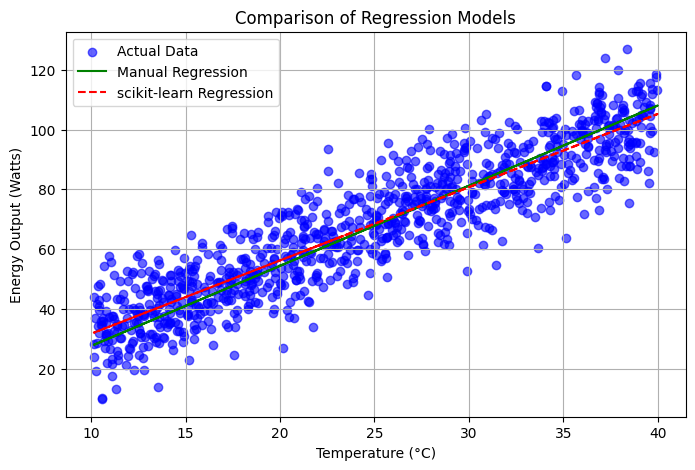

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
# Line from manual gradient descent model
plt.plot(X, w_final * X + b_final, color='green', label='Manual Regression')
# Line from scikit-learn model
plt.plot(X, y_pred, color='red', linestyle='--', label='scikit-learn Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Output (Watts)')
plt.title('Comparison of Regression Models')
plt.legend()
plt.grid(True)
plt.show()